# Vehicle Insurance Project

**Library Imports**

- **Objective:** To set up the Python environment with necessary data science libraries.

- **Code:** Imports pandas (for data manipulation), seaborn and matplotlib.pyplot (for
data visualization), and numpy (for numerical operations).

- **Outcome:** The environment is initialized and ready for analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**Load Data**

- **Objective:** To ingest the raw dataset into the notebook.

- **Code:** Uses pd.read_csv() to load 'Vehicle_Insurance.csv' into a DataFrame named df.

- **Outcome:** The data is loaded into memory.


In [2]:
df = pd.read_csv('Vehicle_Insurance.csv')

# Data Inspection & Cleaning
- **Objective:** To understand the dataset's structure, check for missing values, and handle
outliers.

- **Code:**

- **df.info():** Displays schema (381,109 rows, 12 columns) and data types.

- **df.isnull().sum():** Checks for null values.

- **df['Annual_Premium'].clip(...):** Creates a new column Premium_Capped where
premiums above the 99th percentile are capped. This prevents extreme outliers from
distorting visualizations.

- **Outcome:**

- **Data Quality:** The dataset is perfectly clean with 0 missing values.

- **Feature Engineering:** A capped premium column is created for better analysis.

In [3]:
print(df.info())
print("\nMissing:\n", df.isnull().sum())
# Cap Annual_Premium outliers at 99th percentile
df['Premium_Capped'] = df['Annual_Premium'].clip(upper=df['Annual_Premium'].quantile(0.99))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None

Missing:
 id                      0
Gender                  0
Age                     0
Driv

# 3. Create Visualizations

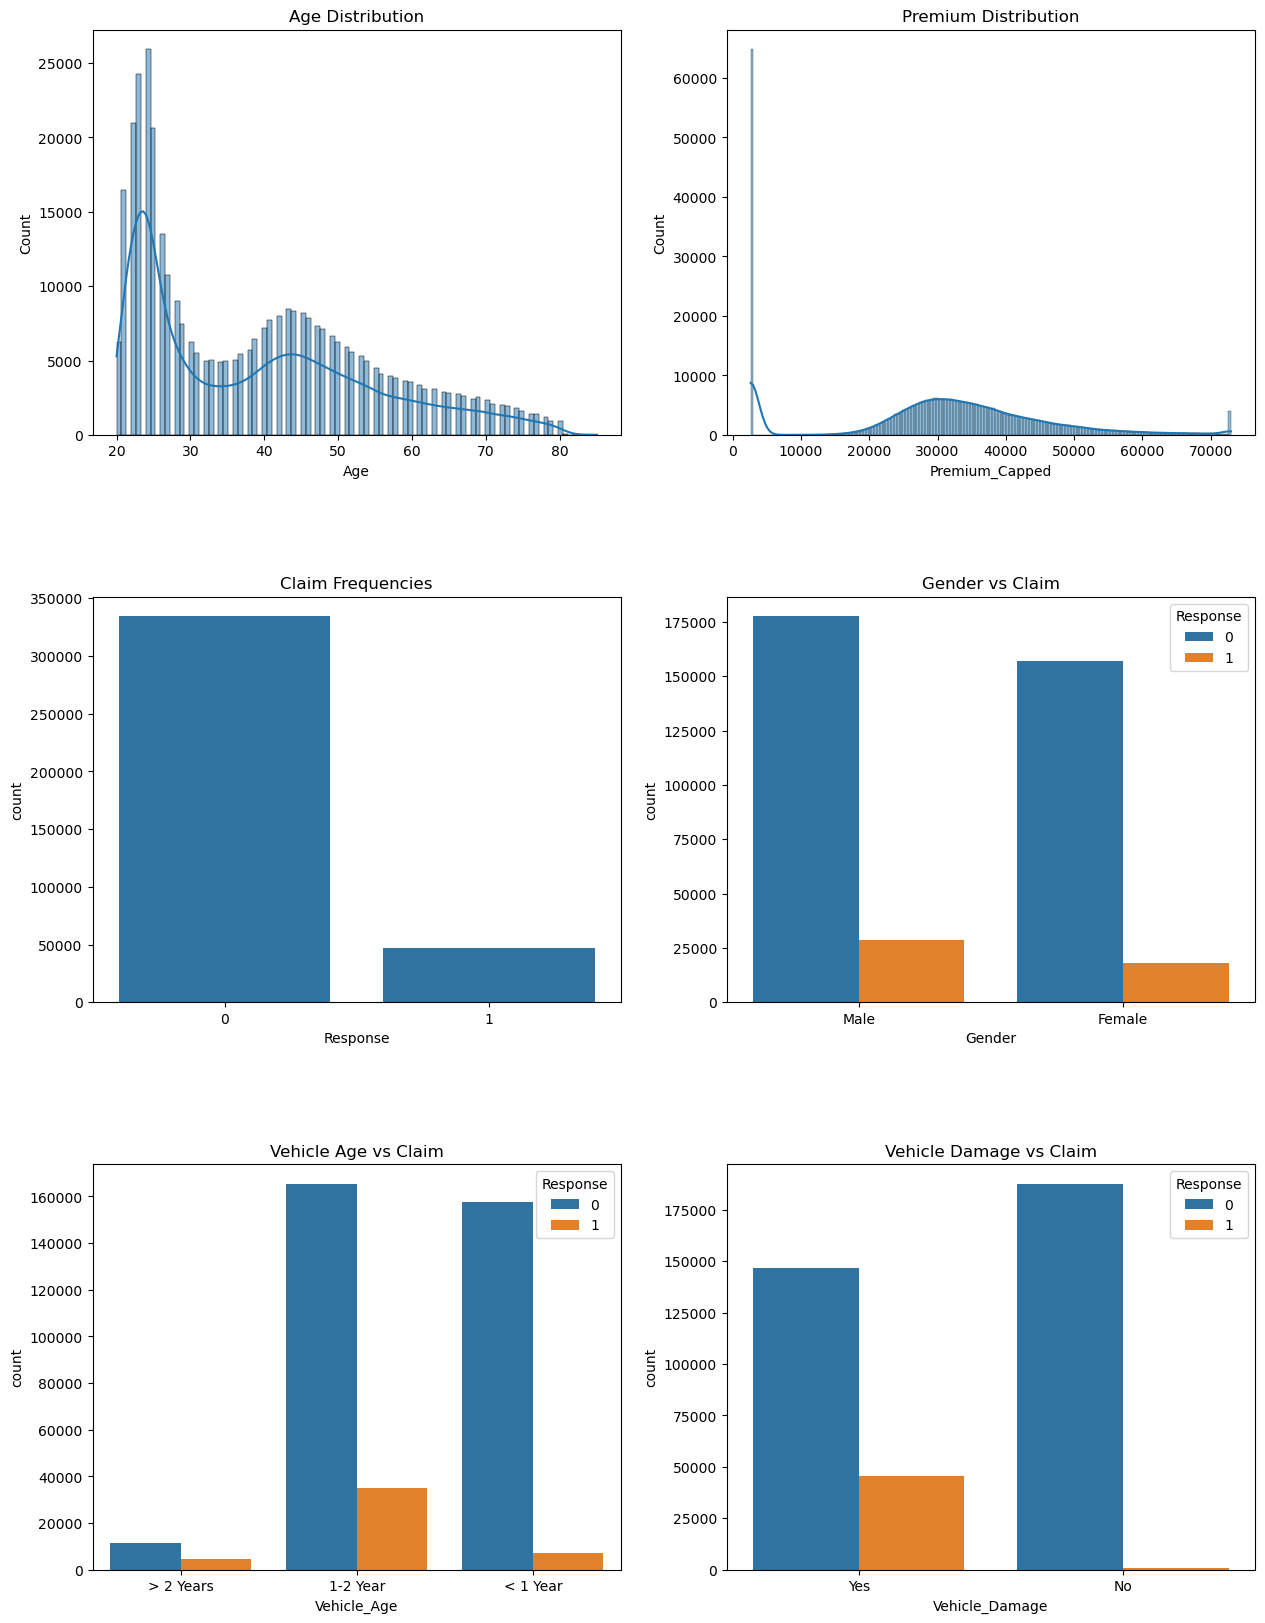

In [4]:
fig, axes = plt.subplots(3,2, figsize=(15, 20))
plt.subplots_adjust(hspace=0.4)
sns.histplot(df['Age'], kde=True, ax=axes[0, 0]).set_title('Age Distribution')
sns.histplot(df['Premium_Capped'], kde=True, ax=axes[0, 1]).set_title('Premium Distribution')
sns.countplot(x='Response', data=df, ax=axes[1, 0]).set_title('Claim Frequencies')
sns.countplot(x='Gender', hue='Response', data=df, ax=axes[1, 1]).set_title('Gender vs Claim')
sns.countplot(x='Vehicle_Age', hue='Response', data=df, ax=axes[2, 0]).set_title('Vehicle Age vs Claim')
sns.countplot(x='Vehicle_Damage', hue='Response', data=df, ax=axes[2, 1]).set_title('Vehicle Damage vs Claim')

plt.savefig('insurance_analysis.png')

**Core Visualization (Insurance Analysis)**
- **Objective:** To visualize key distributions and relationships between features and the target
variable (Response).

- **Code:** A figure with 6 subplots is generated using seaborn and saved as
'insurance_analysis.png'.

- **Visual Insights:**

- **Age Distribution:** The customer base is predominantly young (peak around 20-25
years), with a second smaller peak around 40-50.

- **Premium Distribution:** Even after capping, premiums are right-skewed, indicating most
policies are standard/low-cost with a few high-value exceptions.

- **Claim Frequencies:** The target class is highly imbalanced; the vast majority of
customers do not file a claim.

- **Gender vs Claim:** There are more male customers, and they appear slightly more likely
to claim than females.

- **Vehicle Age vs Claim:** There is a clear trend: Owners of older vehicles (>2 Years) are
significantly more likely to claim than owners of new vehicles (<1 Year).

- **Vehicle Damage vs Claim:** This shows the strongest correlation. Almost zero
customers without vehicle damage filed a claim, whereas a significant portion of those
with damage did.

# Top 10 Regions

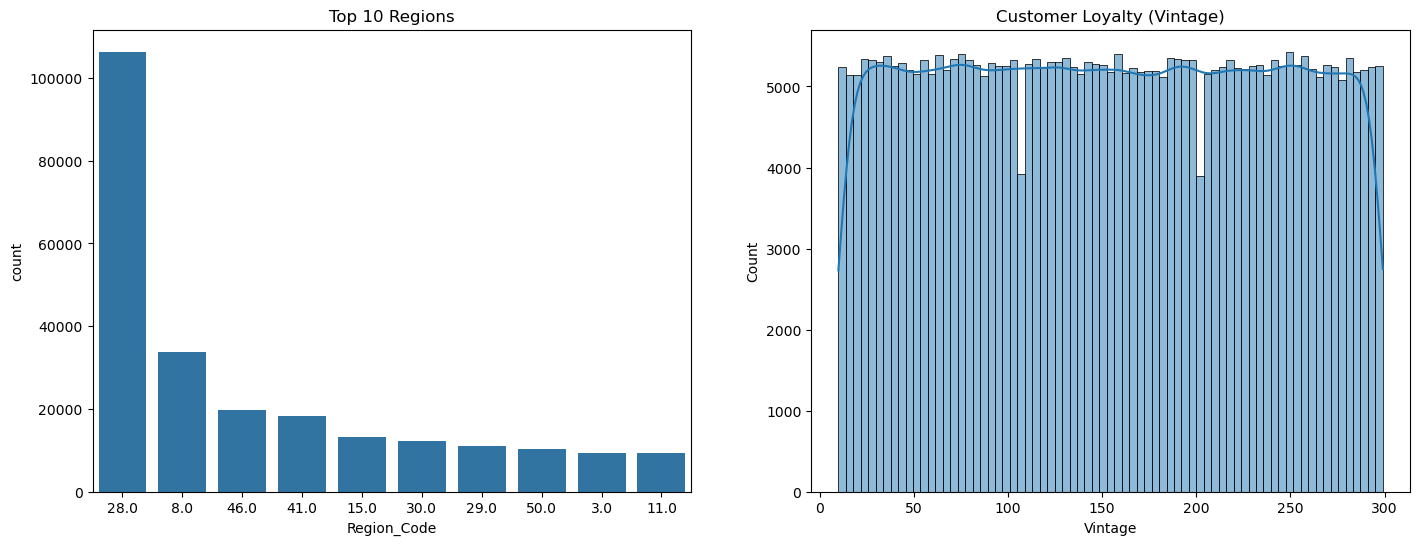

In [5]:
fig, axes = plt.subplots(1,2, figsize=(17, 6))
plt.subplots_adjust(hspace=0.4)
sns.countplot(x='Region_Code', data=df, order=df['Region_Code'].value_counts().head(10).index, ax=axes[0]).set_title('Top 10 Regions')
sns.histplot(df['Vintage'], kde=True, ax=axes[1]).set_title('Customer Loyalty (Vintage)')
plt.show()

**Regional & Loyalty Analysis**
- **Objective:** To analyze geographical concentration and customer tenure.

- **Code:** Generates two plots: Top 10 Regions and Vintage distribution.

- **Visual Insights:**

- **Top 10 Regions:** Region 28 is an extreme outlier, containing a massive portion of the
customer base compared to others.

- **Customer Loyalty (Vintage):** The distribution is nearly perfectly uniform. This means
the company acquires and retains customers at a very steady rate over time, with no
specific "drop-off" points in tenure

In [6]:
print("Claim Rates:\n", df.groupby('Vehicle_Damage')['Response'].mean())

Claim Rates:
 Vehicle_Damage
No     0.005204
Yes    0.237655
Name: Response, dtype: float64


**Statistical Validation**
- **Objective:** To numerically confirm the visual insight regarding vehicle damage.

- **Code:** Groups data by Vehicle_Damage and calculates the mean of Response (Claim
Rate).

- **Outcome:**

- **Customers with NO Damage:** 0.5% Claim Rate.

- **Customers WITH Damage:** 23.8% Claim Rate.

- **Conclusion:** Previous vehicle damage is the single most predictive feature in this dataset.